<a href="https://colab.research.google.com/github/Honeymaker750/Honeymaker750/blob/main/RainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('weatherAUS.csv')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values


In [ ]:
print(X)


[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
Y = Y.reshape(-1,1)# 1D list into 2D list
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


#Dealing with invalid dataset
using imputer class of  sklearn 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [ ]:
print(X)
print(Y)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]
[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


#Encoding Dataset 


In [ ]:
from sklearn.preprocessing import LabelEncoder 
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y = le6.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [ ]:
print(Y)

[0 0 0 ... 0 0 0]


#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


+#data visualization


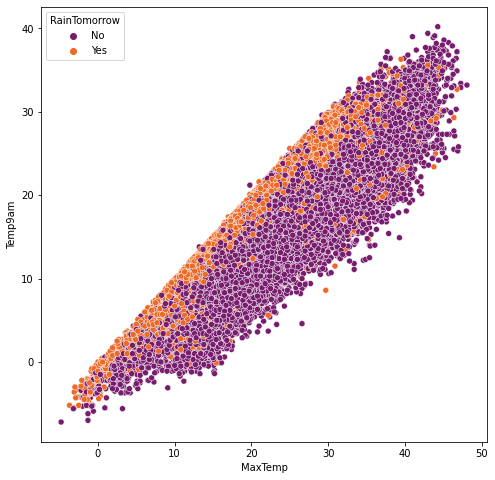

In [ ]:
plt.figure(figsize= (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'Temp9am' , hue = 'RainTomorrow' , palette = 'inferno',data = dataset)

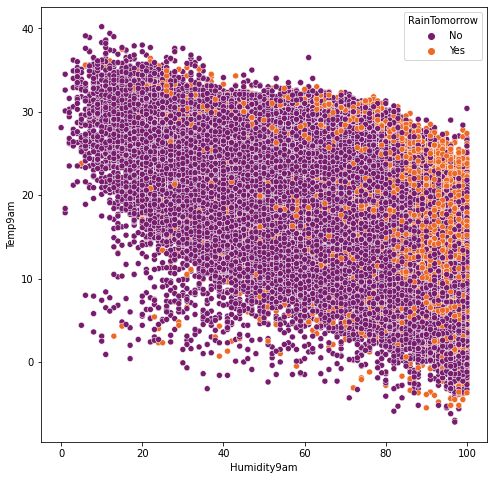

In [ ]:
plt.figure(figsize= (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am' , hue = 'RainTomorrow' , palette = 'inferno',data = dataset)

#Splting dataset into Training set and Test set 


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [ ]:
print(Y_train)

[1 0 0 ... 0 0 0]


#Training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
classifier.score(X_train,Y_train)

0.9999398460057748

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(y_pred )


[0 0 0 ... 0 0 0]


In [ ]:
y_pred = le6.inverse_transform(y_pred)  

In [ ]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [ ]:
print(Y_test)


[1 1 0 ... 1 0 0]


In [ ]:
Y_test = le6.inverse_transform(Y_test)

In [ ]:
print(Y_test)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [ ]:
 Y_test = Y_test.reshape(-1,1)
 y_pred = y_pred.reshape(-1,1)

In [ ]:
df = np.concatenate((Y_test,y_pred),axis = 1)
dataframe = pd.DataFrame(df,columns=['Rain on tommorow','Prediction of rain'])


In [ ]:
print(dataframe)

      Rain on tommorow Prediction of rain
0                  Yes                 No
1                  Yes                 No
2                   No                 No
3                   No                Yes
4                   No                 No
...                ...                ...
29087               No                Yes
29088               No                 No
29089              Yes                 No
29090               No                 No
29091               No                 No

[29092 rows x 2 columns]


In [ ]:
dataframe.to_csv('Rain prediction.csv')

#Checking Accuracy of our Training model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


0.8538773545992026

In [ ]:
dataframe.to_csv("Rain prediction.csv")